<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/27%20-%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_row', 105)
pd.set_option('display.max_column', 105)

In [7]:
chemin = "X_train_v2.csv"
X = pd.read_csv(chemin, index_col=0, encoding = "ISO-8859-1")

In [8]:
X.iloc[[i for i in range(100)]]


WF              Time  NWP1_00h_D-2_U  NWP1_00h_D-2_V  NWP1_00h_D-2_T  \
ID                                                                           
1    WF1  01/05/2018 01:00             NaN             NaN             NaN   
2    WF1  01/05/2018 02:00             NaN             NaN             NaN   
3    WF1  01/05/2018 03:00             NaN             NaN             NaN   
4    WF1  01/05/2018 04:00             NaN             NaN             NaN   
5    WF1  01/05/2018 05:00             NaN             NaN             NaN   
6    WF1  01/05/2018 06:00             NaN             NaN             NaN   
7    WF1  01/05/2018 07:00             NaN             NaN             NaN   
8    WF1  01/05/2018 08:00             NaN             NaN             NaN   
9    WF1  01/05/2018 09:00             NaN             NaN             NaN   
10   WF1  01/05/2018 10:00             NaN             NaN             NaN   
11   WF1  01/05/2018 11:00             NaN             NaN             NaN   
12   WF1  01/05/2018 12:00             NaN             NaN             NaN   
13   WF1  01/05/2018 13:00             NaN             NaN             NaN   
14   WF1  01/05/2018 14:00             NaN             NaN             NaN   
15   WF1  01/05/2018 15:00             NaN             NaN             NaN   
16   WF1  01/05/2018 16:00             NaN             NaN             NaN   
17   WF1  01/05/2018 17:00             NaN             NaN             NaN   
18   WF1  01/05/2018 18:00             NaN             NaN             NaN   
19   WF1  01/05/2018 19:00             NaN             NaN             NaN   
20   WF1  01/05/2018 20:00             NaN             NaN             NaN   
21   WF1  01/05/2018 21:00             NaN             NaN             NaN   
22   WF1  01/05/2018 22:00             NaN             NaN             NaN   
23   WF1  01/05/2018 23:00             NaN             NaN             NaN   
24   WF1  02/05/2018 00:00             NaN             NaN             NaN   
25   WF1  02/05/2018 01:00             NaN             NaN             NaN   
26   WF1  02/05/2018 02:00             NaN             NaN             NaN   
27   WF1  02/05/2018 03:00             NaN             NaN             NaN   
28   WF1  02/05/2018 04:00             NaN             NaN             NaN   
29   WF1  02/05/2018 05:00             NaN             NaN             NaN   
30   WF1  02/05/2018 06:00             NaN             NaN             NaN   
31   WF1  02/05/2018 07:00             NaN             NaN             NaN   
32   WF1  02/05/2018 08:00             NaN             NaN             NaN   
33   WF1  02/05/2018 09:00             NaN             NaN             NaN   
34   WF1  02/05/2018 10:00             NaN             NaN             NaN   
35   WF1  02/05/2018 11:00             NaN             NaN             NaN   
36   WF1  02/05/2018 12:00             NaN             NaN             NaN   
37   WF1  02/05/2018 13:00             NaN             NaN             NaN   
38   WF1  02/05/2018 14:00             NaN             NaN             NaN   
39   WF1  02/05/2018 15:00             NaN             NaN             NaN   
40   WF1  02/05/2018 16:00             NaN             NaN             NaN   
41   WF1  02/05/2018 17:00             NaN             NaN             NaN   
42   WF1  02/05/2018 18:00             NaN             NaN             NaN   
43   WF1  02/05/2018 19:00             NaN             NaN             NaN   
44   WF1  02/05/2018 20:00             NaN             NaN             NaN   
45   WF1  02/05/2018 21:00             NaN             NaN             NaN   
46   WF1  02/05/2018 22:00             NaN             NaN             NaN   
47   WF1  02/05/2018 23:00             NaN             NaN             NaN   
48   WF1  03/05/2018 00:00          5.4041        -14.7490          289.73   
49   WF1  03/05/2018 01:00          4.8424        -15.4050          289.38   
50   WF1  03/05/2018 02:00  

In [9]:
X_WF1 = X[X['WF']=='WF1']
X_WF1.shape

(6239, 104)

In [10]:
y = pd.read_csv('Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")

In [11]:
X_WF1_indexes = X.index[X['WF']=='WF1']

y_WF1 = y.iloc[X_WF1_indexes] 

# 1. Exploratory Data Analysis (X_WF1)

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Production
- **lignes et colonnes** : 6239 , 104
- **types de variables** : qualitatives : 2 , quantitatives : 102
- **Analyse des valeurs manquantes** :
    - beaucoup de NaN 
    - plusieurs groupes de données 1% -> ? , ... , 90 %  -> ?

#### Analyse de Fond :
- **Visualisation de la target** :
    - production entre 0 et 10.14
    

- **Signification des variables** :
    - variables continues 
    - loi normale centrée réduite pour U et V
    - loi normale d'espérance 295 pour T (variable provided only for NWP1 and NWP3)
    - variable symétrique pour CLCT (variable is provided only for NWP4) qui semble majoritairement valoir son min et son max

- **Relation Variables / Target** :
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - lien entre les modèles NWP à la même heure
    - obervation de la fluctuation de la valeur des variables sur 2 jours pour un NWP fixé
    - relation entre les variables à t fixé et NWP fixé.
    



    

### Analyse de la forme des données

In [12]:
df = X_WF1.copy()

In [13]:
df.shape

(6239, 104)

In [14]:
df.dtypes.value_counts()

float64    102
object       2
dtype: int64

<AxesSubplot:ylabel='ID'>

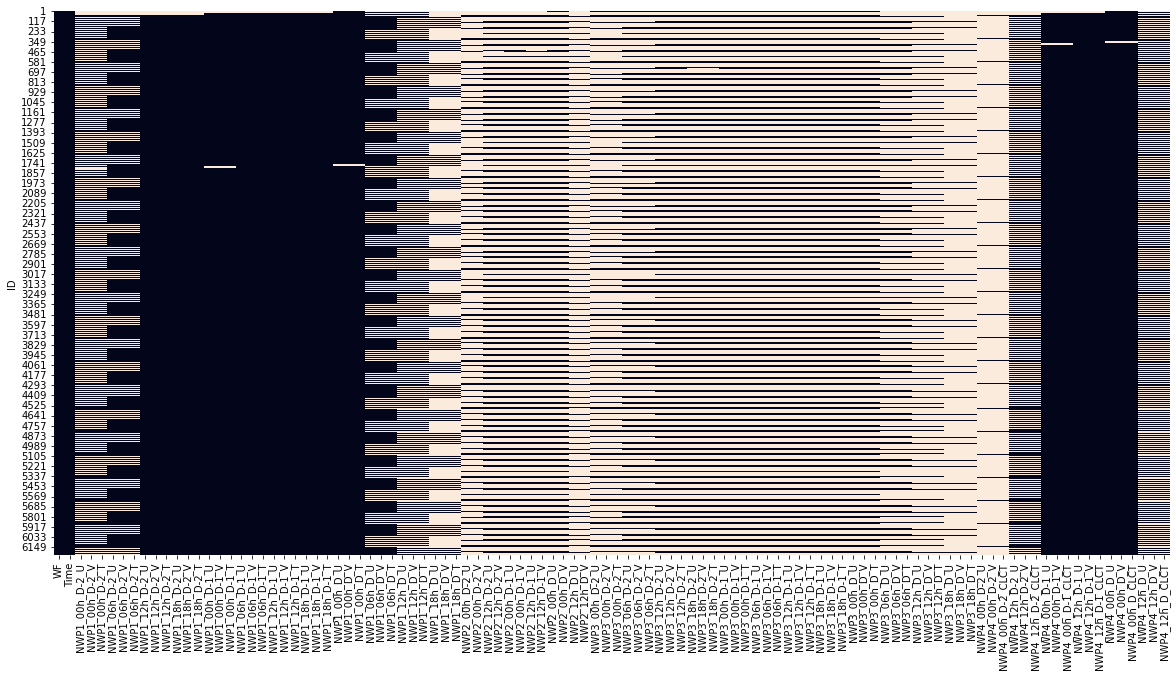

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [16]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

WF                   0.000000
Time                 0.000000
NWP4_12h_D-1_U       0.003686
NWP4_12h_D-1_V       0.003686
NWP4_12h_D-1_CLCT    0.003686
NWP1_18h_D-1_T       0.003686
NWP1_18h_D-1_V       0.003686
NWP1_18h_D-1_U       0.003686
NWP1_12h_D-1_V       0.003686
NWP1_12h_D-1_U       0.003686
NWP1_06h_D-1_T       0.003686
NWP1_06h_D-1_V       0.003686
NWP1_06h_D-1_U       0.003686
NWP1_12h_D-1_T       0.003686
NWP4_00h_D_V         0.003847
NWP4_00h_D_U         0.003847
NWP1_00h_D_T         0.003847
NWP1_00h_D_V         0.003847
NWP1_00h_D_U         0.003847
NWP4_00h_D_CLCT      0.003847
NWP4_00h_D-1_CLCT    0.007533
NWP4_00h_D-1_V       0.007533
NWP1_18h_D-2_T       0.007533
NWP1_00h_D-1_U       0.007533
NWP4_00h_D-1_U       0.007533
NWP1_12h_D-2_U       0.007533
NWP1_12h_D-2_V       0.007533
NWP1_12h_D-2_T       0.007533
NWP1_18h_D-2_U       0.007533
NWP1_18h_D-2_V       0.007533
NWP1_00h_D-1_T       0.007533
NWP1_00h_D-1_V       0.007533
NWP1_06h_D-2_U       0.214297
NWP1_06h_D

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [17]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

<AxesSubplot:ylabel='ID'>

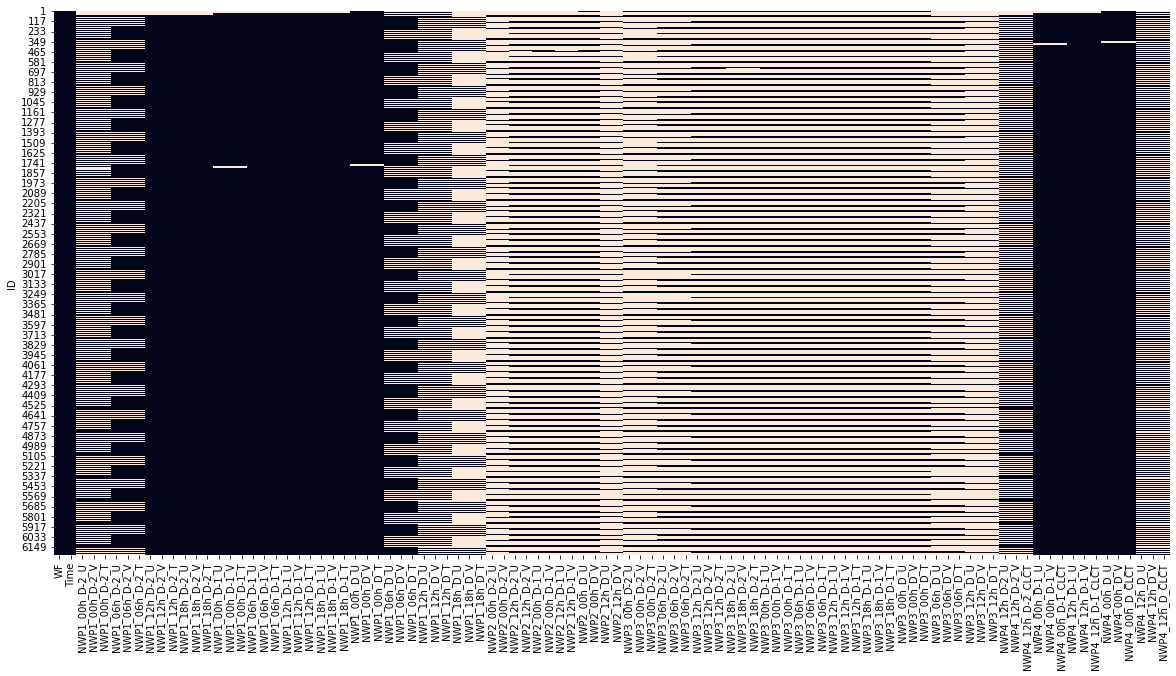

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [19]:
df.head()

WF              Time  NWP1_00h_D-2_U  NWP1_00h_D-2_V  NWP1_00h_D-2_T  \
ID                                                                          
1   WF1  01/05/2018 01:00             NaN             NaN             NaN   
2   WF1  01/05/2018 02:00             NaN             NaN             NaN   
3   WF1  01/05/2018 03:00             NaN             NaN             NaN   
4   WF1  01/05/2018 04:00             NaN             NaN             NaN   
5   WF1  01/05/2018 05:00             NaN             NaN             NaN   

    NWP1_06h_D-2_U  NWP1_06h_D-2_V  NWP1_06h_D-2_T  NWP1_12h_D-2_U  \
ID                                                                   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   
5              NaN             NaN             NaN             NaN   

    NWP1_12h_D-2_V  NWP1_12h_D-2_T  NWP1_18h_D-2_U  NWP1_18h_D-2_V  \
ID                                                                   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   
5              NaN             NaN             NaN             NaN   

    NWP1_18h_D-2_T  NWP1_00h_D-1_U  NWP1_00h_D-1_V  NWP1_00h_D-1_T  \
ID                                                                   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   
5              NaN             NaN             NaN             NaN   

    NWP1_06h_D-1_U  NWP1_06h_D-1_V  NWP1_06h_D-1_T  NWP1_12h_D-1_U  \
ID                                                                   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   
5              NaN             NaN             NaN             NaN   

    NWP1_12h_D-1_V  NWP1_12h_D-1_T  NWP1_18h_D-1_U  NWP1_18h_D-1_V  \
ID                                                                   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   
5              NaN             NaN             NaN             NaN   

    NWP1_18h_D-1_T  NWP1_00h_D_U  NWP1_00h_D_V  NWP1_00h_D_T  NWP1_06h_D_U  \
ID                                                                           
1              NaN       -2.2485       -3.2578        286.44           NaN   
2              NaN       -2.4345       -1.4461        286.26           NaN   
3              NaN        3.3659       -3.0605        285.75           NaN   
4              NaN        3.7065       -6.2174        284.78           NaN   
5              NaN        3.8134       -5.4446        284.46           NaN   

    NWP1_06h_D_V  NWP1_06h_D_T  NWP1_12h_D_U  NWP1_12h_D_V  NWP1_12h_D_T  \
ID                                                                         
1            NaN           NaN           NaN           NaN           NaN   
2            NaN           NaN           NaN           NaN           NaN   
3            NaN           NaN           NaN           NaN           NaN   
4            NaN           NaN           NaN           NaN           NaN   
5      

### Examen de la colonne target

In [20]:
y_WF1["Production"].max()

10.14

### histogrames des variables continues 

/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_40068/2777817021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

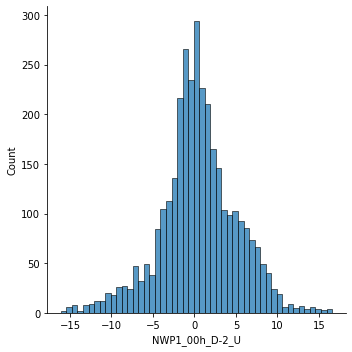

<Figure size 432x288 with 0 Axes>

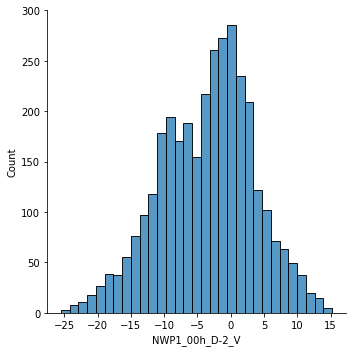

<Figure size 432x288 with 0 Axes>

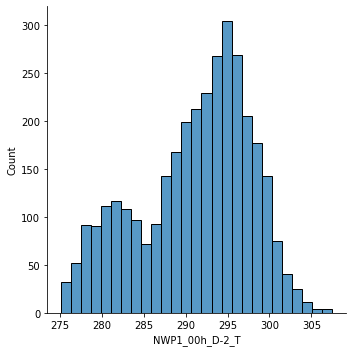

<Figure size 432x288 with 0 Axes>

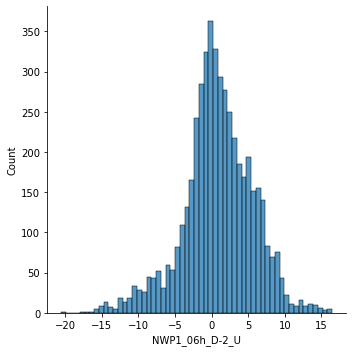

<Figure size 432x288 with 0 Axes>

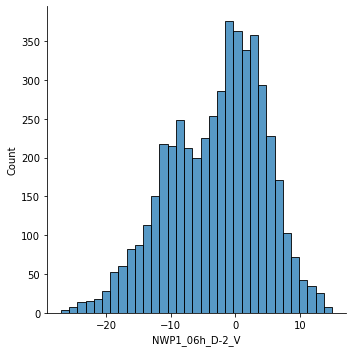

<Figure size 432x288 with 0 Axes>

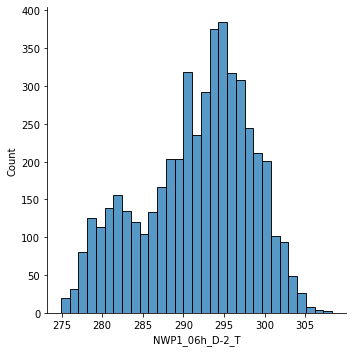

<Figure size 432x288 with 0 Axes>

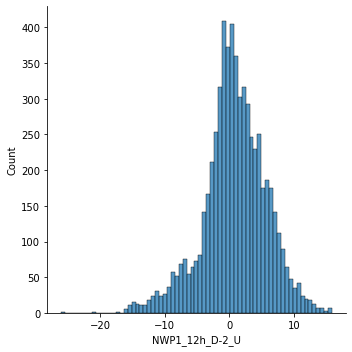

<Figure size 432x288 with 0 Axes>

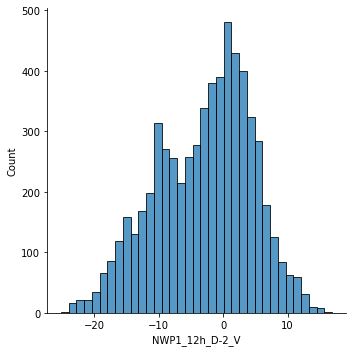

<Figure size 432x288 with 0 Axes>

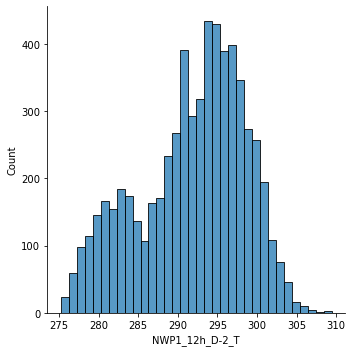

<Figure size 432x288 with 0 Axes>

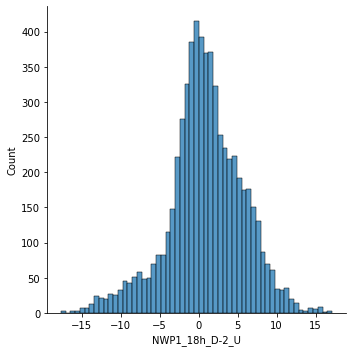

<Figure size 432x288 with 0 Axes>

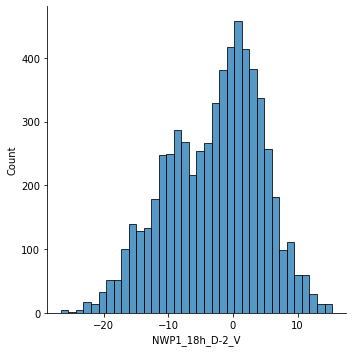

<Figure size 432x288 with 0 Axes>

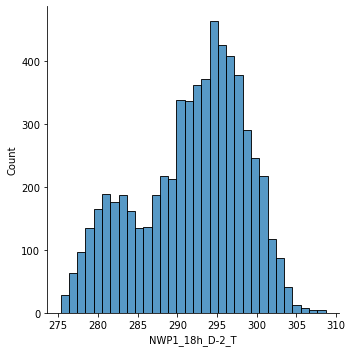

<Figure size 432x288 with 0 Axes>

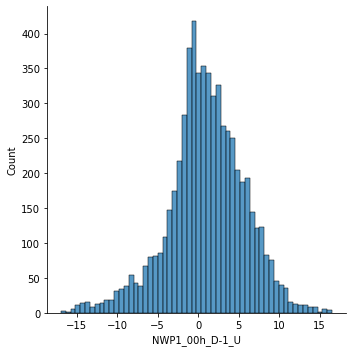

<Figure size 432x288 with 0 Axes>

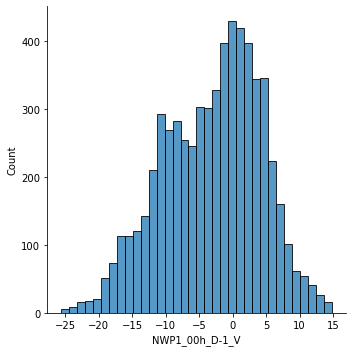

<Figure size 432x288 with 0 Axes>

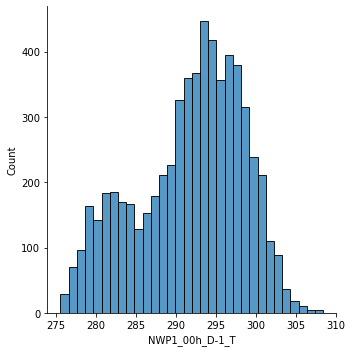

<Figure size 432x288 with 0 Axes>

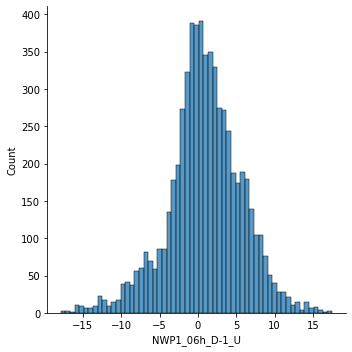

<Figure size 432x288 with 0 Axes>

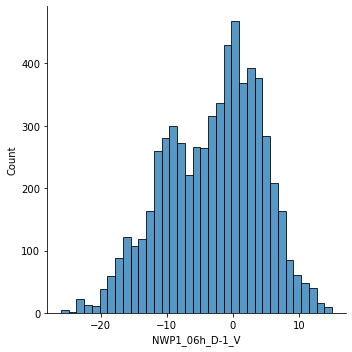

<Figure size 432x288 with 0 Axes>

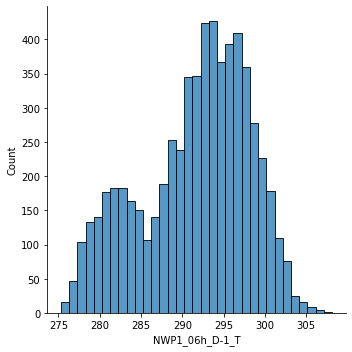

<Figure size 432x288 with 0 Axes>

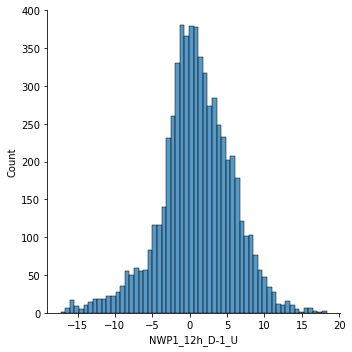

<Figure size 432x288 with 0 Axes>

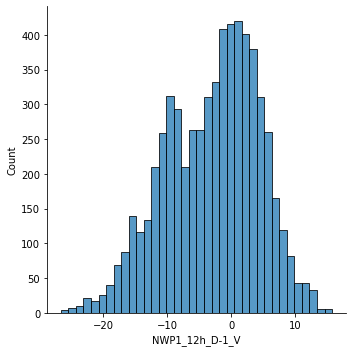

<Figure size 432x288 with 0 Axes>

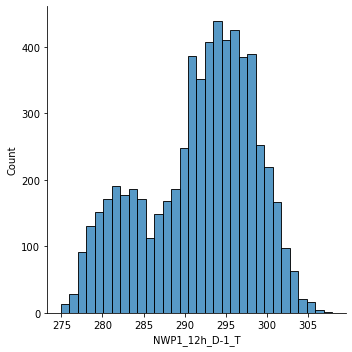

<Figure size 432x288 with 0 Axes>

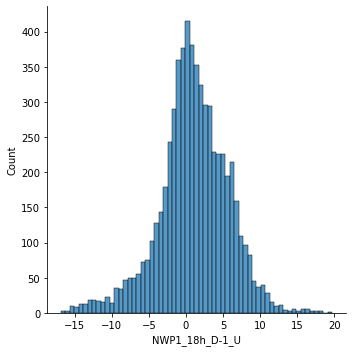

<Figure size 432x288 with 0 Axes>

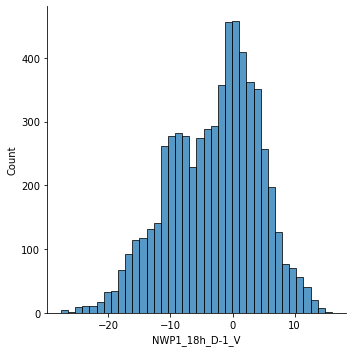

<Figure size 432x288 with 0 Axes>

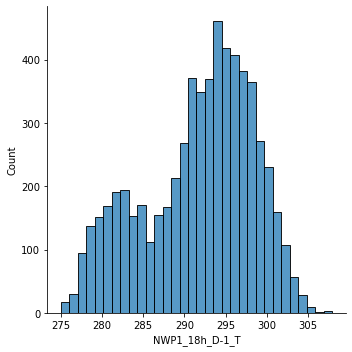

<Figure size 432x288 with 0 Axes>

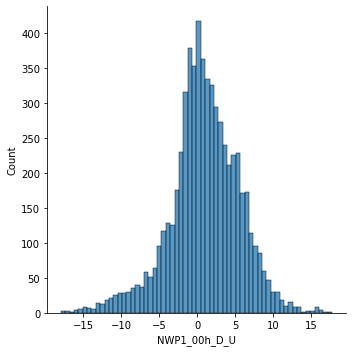

<Figure size 432x288 with 0 Axes>

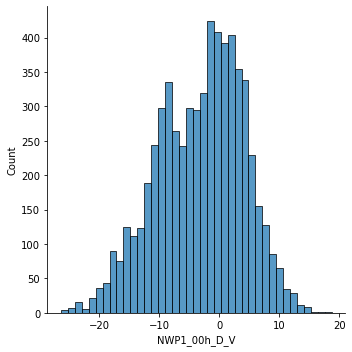

<Figure size 432x288 with 0 Axes>

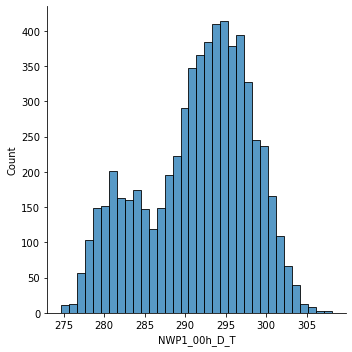

<Figure size 432x288 with 0 Axes>

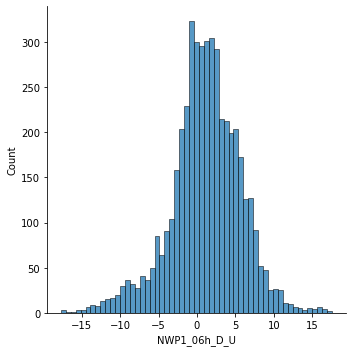

<Figure size 432x288 with 0 Axes>

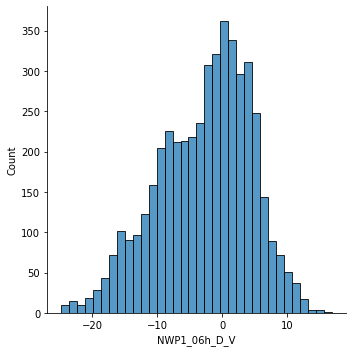

<Figure size 432x288 with 0 Axes>

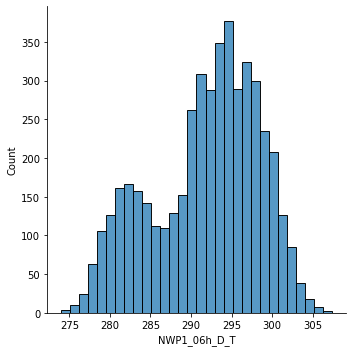

<Figure size 432x288 with 0 Axes>

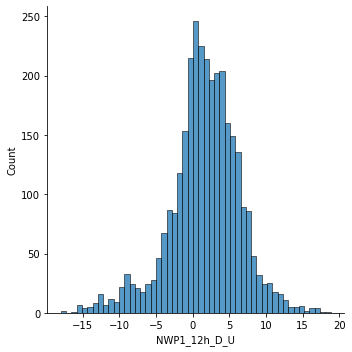

<Figure size 432x288 with 0 Axes>

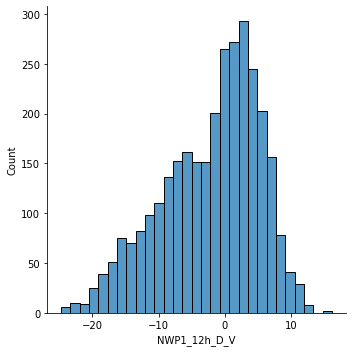

<Figure size 432x288 with 0 Axes>

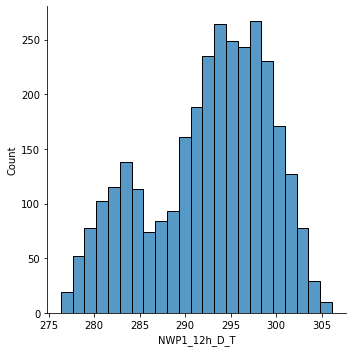

<Figure size 432x288 with 0 Axes>

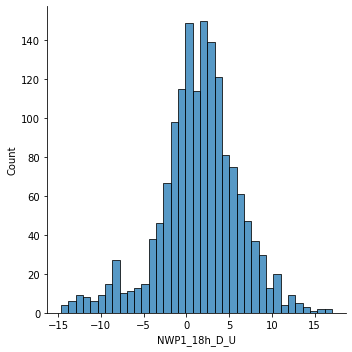

<Figure size 432x288 with 0 Axes>

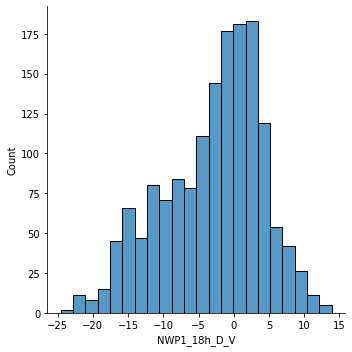

<Figure size 432x288 with 0 Axes>

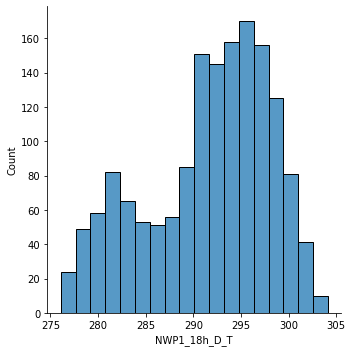

<Figure size 432x288 with 0 Axes>

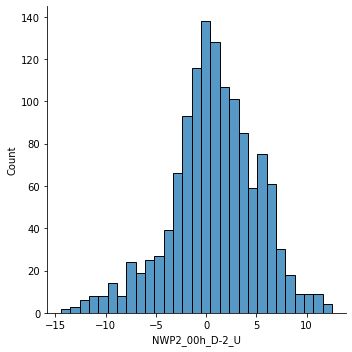

<Figure size 432x288 with 0 Axes>

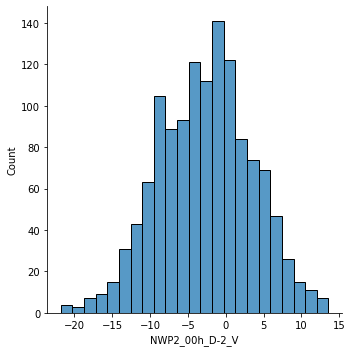

<Figure size 432x288 with 0 Axes>

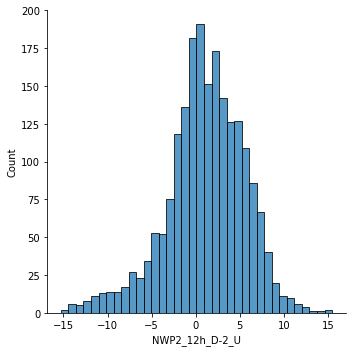

<Figure size 432x288 with 0 Axes>

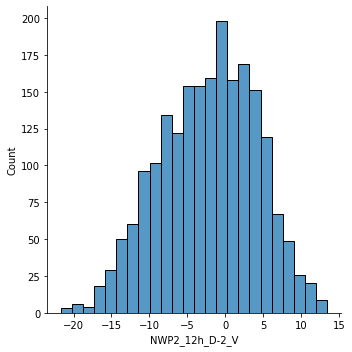

<Figure size 432x288 with 0 Axes>

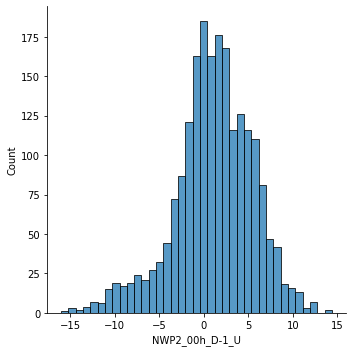

<Figure size 432x288 with 0 Axes>

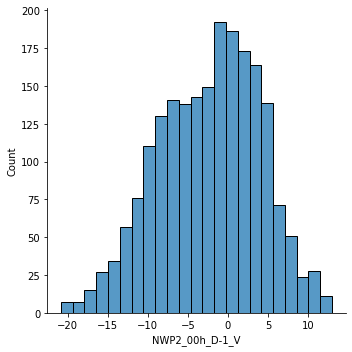

<Figure size 432x288 with 0 Axes>

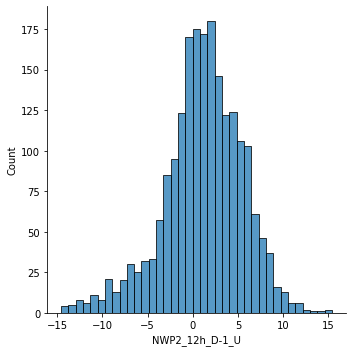

<Figure size 432x288 with 0 Axes>

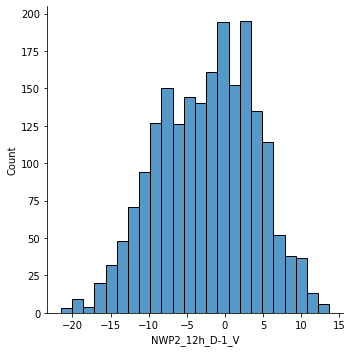

<Figure size 432x288 with 0 Axes>

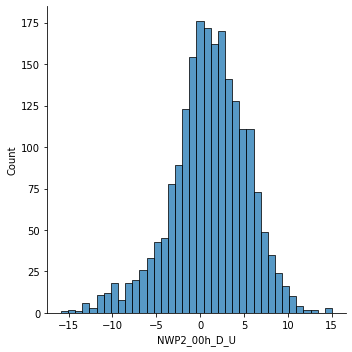

<Figure size 432x288 with 0 Axes>

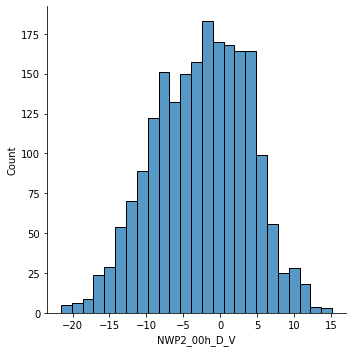

<Figure size 432x288 with 0 Axes>

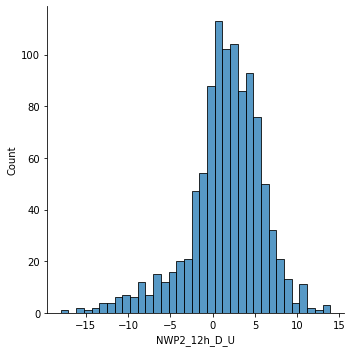

<Figure size 432x288 with 0 Axes>

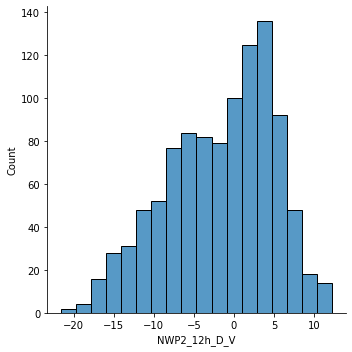

<Figure size 432x288 with 0 Axes>

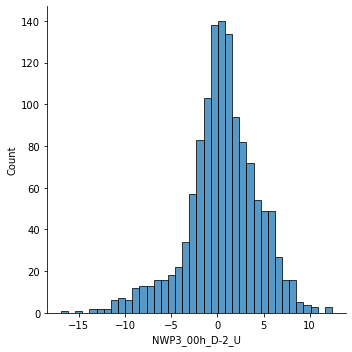

<Figure size 432x288 with 0 Axes>

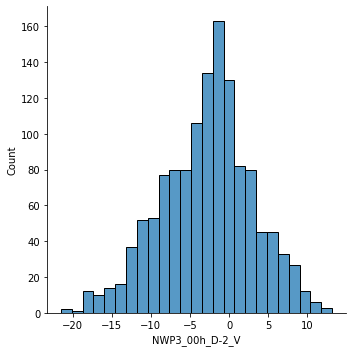

<Figure size 432x288 with 0 Axes>

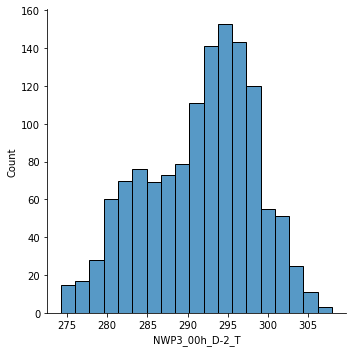

<Figure size 432x288 with 0 Axes>

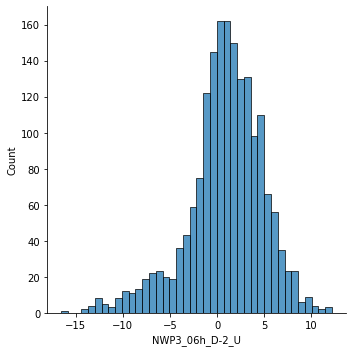

<Figure size 432x288 with 0 Axes>

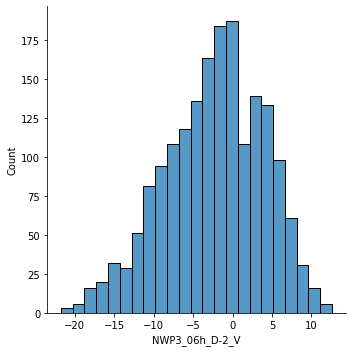

<Figure size 432x288 with 0 Axes>

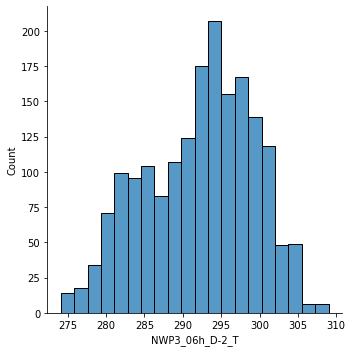

<Figure size 432x288 with 0 Axes>

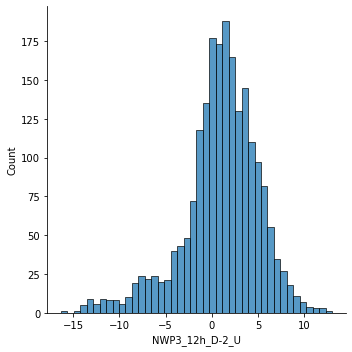

<Figure size 432x288 with 0 Axes>

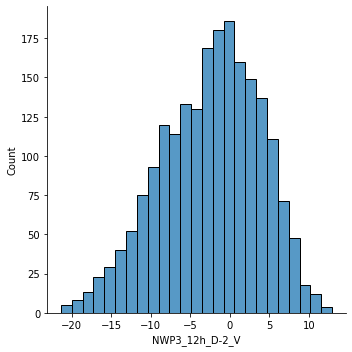

<Figure size 432x288 with 0 Axes>

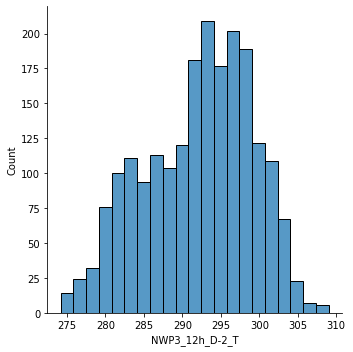

<Figure size 432x288 with 0 Axes>

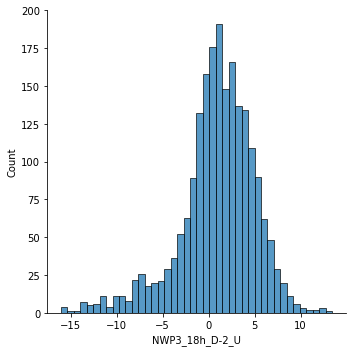

<Figure size 432x288 with 0 Axes>

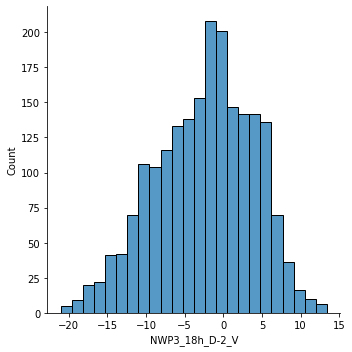

<Figure size 432x288 with 0 Axes>

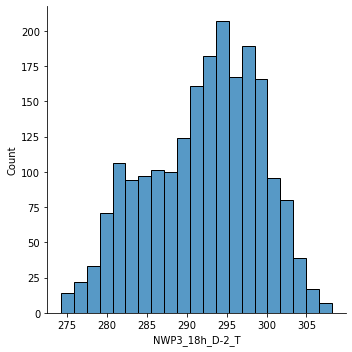

<Figure size 432x288 with 0 Axes>

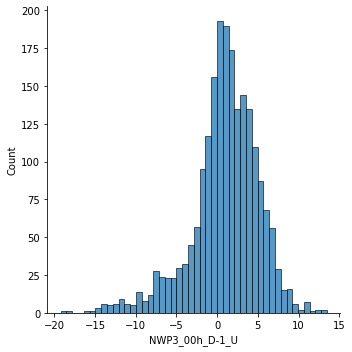

<Figure size 432x288 with 0 Axes>

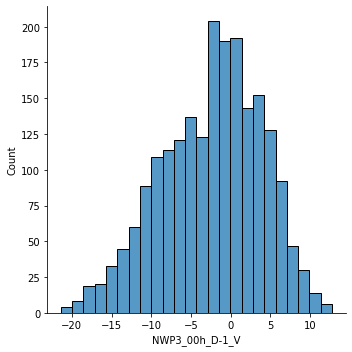

<Figure size 432x288 with 0 Axes>

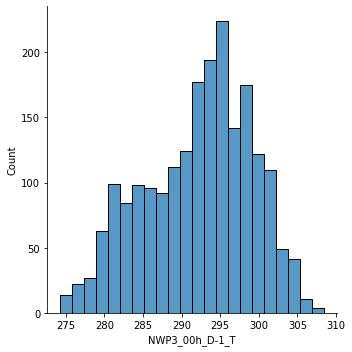

<Figure size 432x288 with 0 Axes>

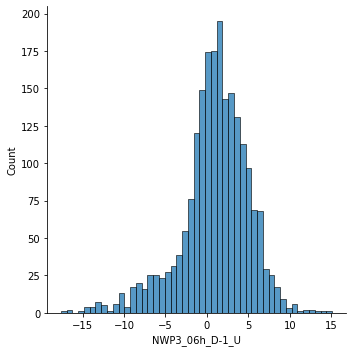

<Figure size 432x288 with 0 Axes>

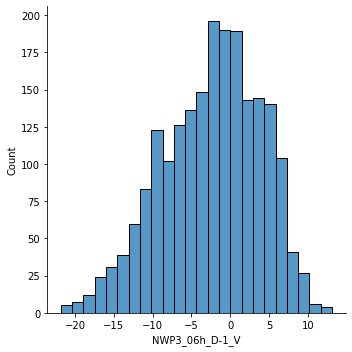

<Figure size 432x288 with 0 Axes>

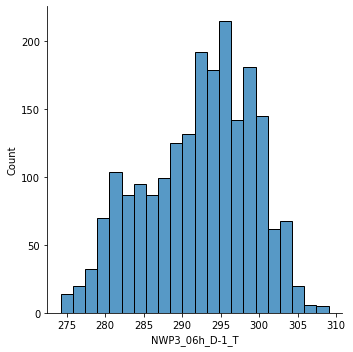

<Figure size 432x288 with 0 Axes>

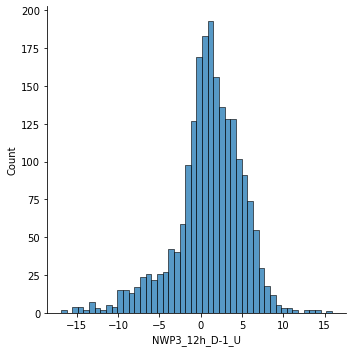

<Figure size 432x288 with 0 Axes>

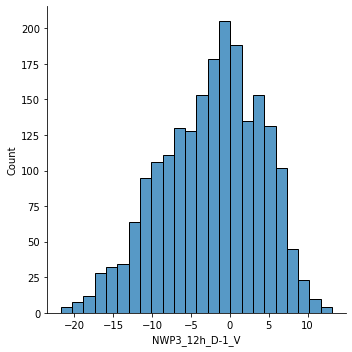

<Figure size 432x288 with 0 Axes>

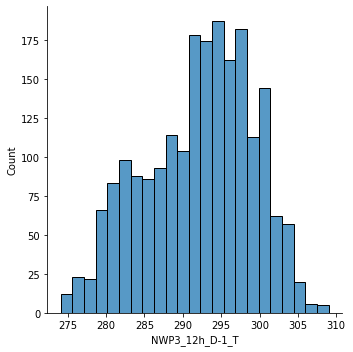

<Figure size 432x288 with 0 Axes>

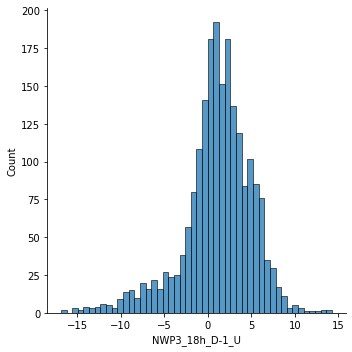

<Figure size 432x288 with 0 Axes>

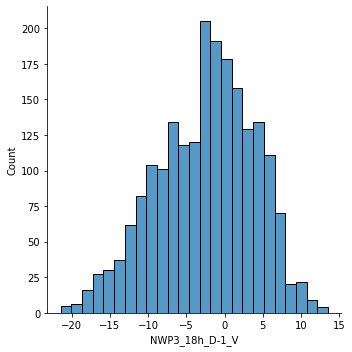

<Figure size 432x288 with 0 Axes>

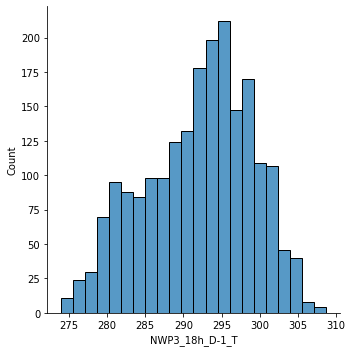

<Figure size 432x288 with 0 Axes>

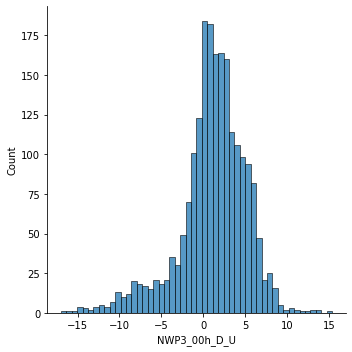

<Figure size 432x288 with 0 Axes>

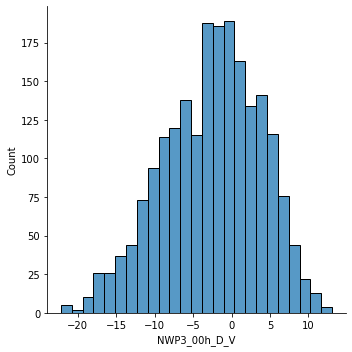

<Figure size 432x288 with 0 Axes>

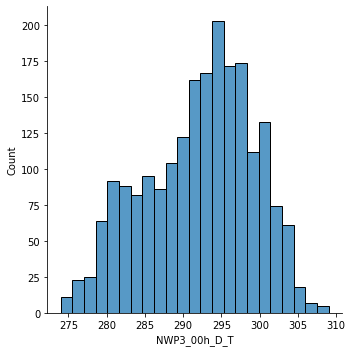

<Figure size 432x288 with 0 Axes>

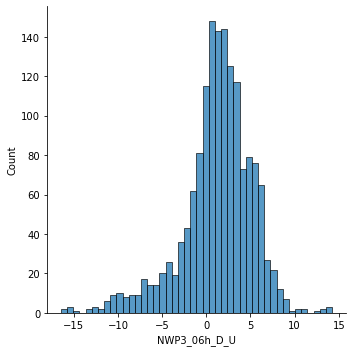

<Figure size 432x288 with 0 Axes>

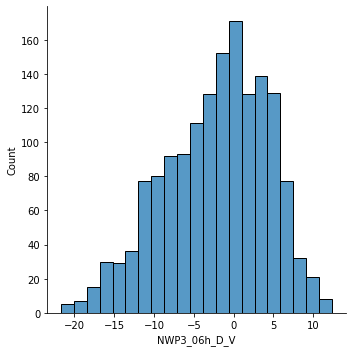

<Figure size 432x288 with 0 Axes>

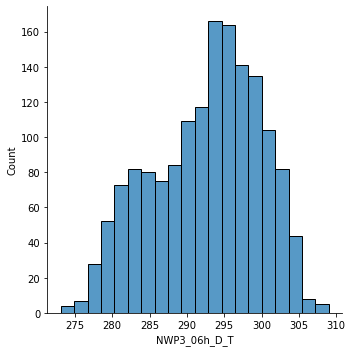

<Figure size 432x288 with 0 Axes>

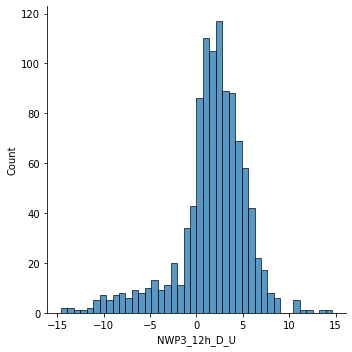

<Figure size 432x288 with 0 Axes>

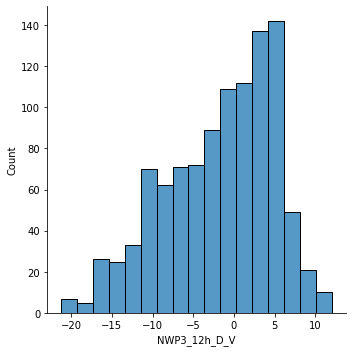

<Figure size 432x288 with 0 Axes>

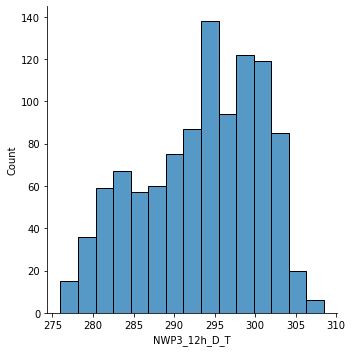

<Figure size 432x288 with 0 Axes>

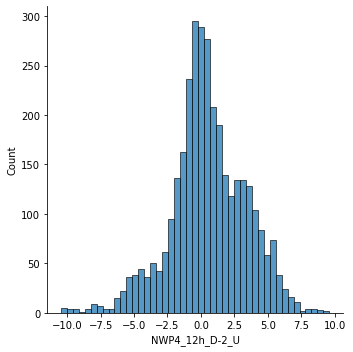

<Figure size 432x288 with 0 Axes>

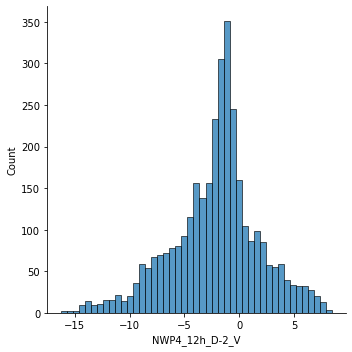

<Figure size 432x288 with 0 Axes>

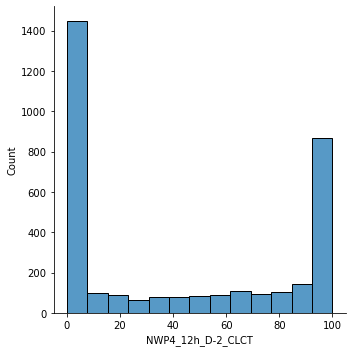

<Figure size 432x288 with 0 Axes>

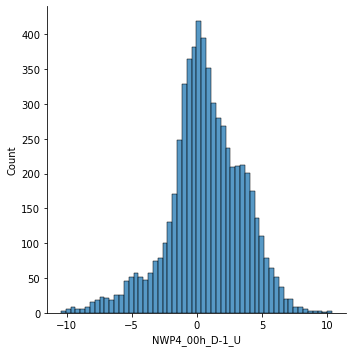

<Figure size 432x288 with 0 Axes>

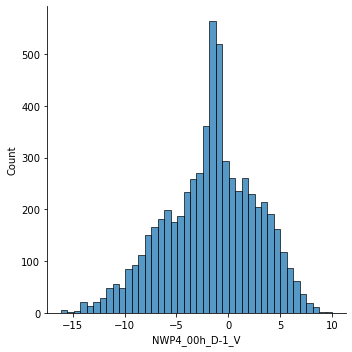

<Figure size 432x288 with 0 Axes>

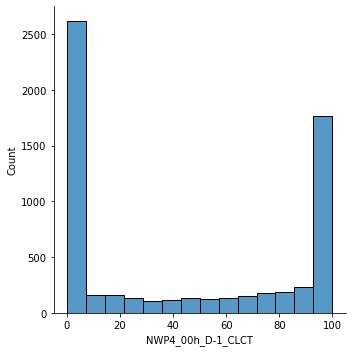

<Figure size 432x288 with 0 Axes>

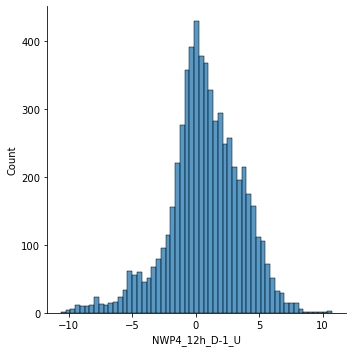

<Figure size 432x288 with 0 Axes>

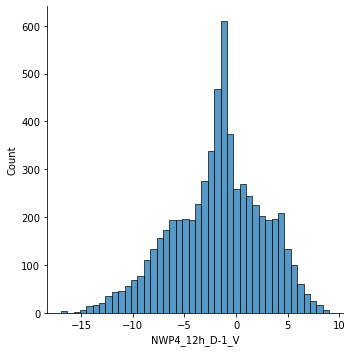

<Figure size 432x288 with 0 Axes>

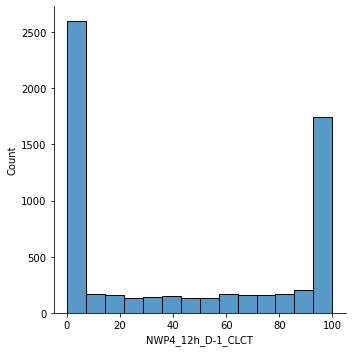

<Figure size 432x288 with 0 Axes>

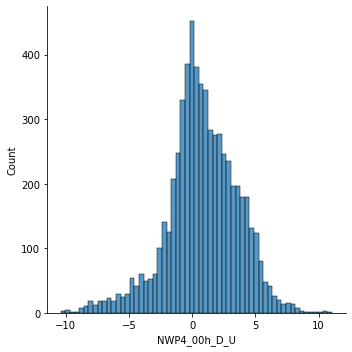

<Figure size 432x288 with 0 Axes>

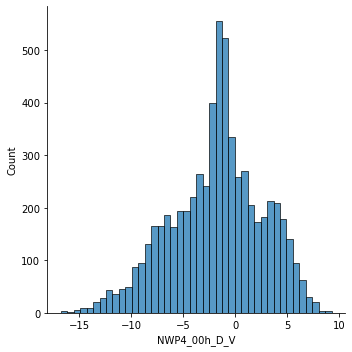

<Figure size 432x288 with 0 Axes>

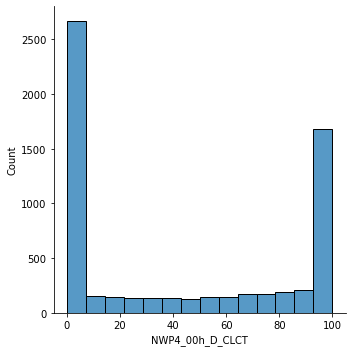

<Figure size 432x288 with 0 Axes>

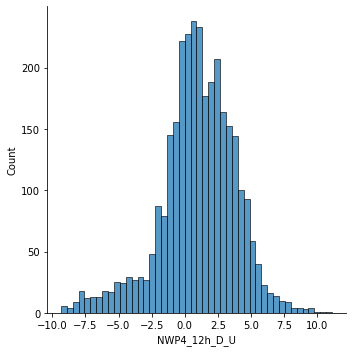

<Figure size 432x288 with 0 Axes>

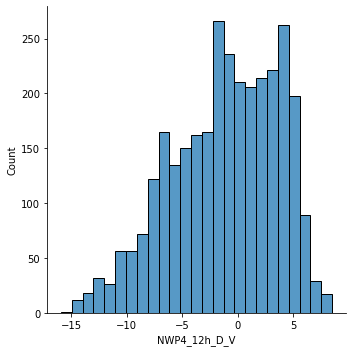

<Figure size 432x288 with 0 Axes>

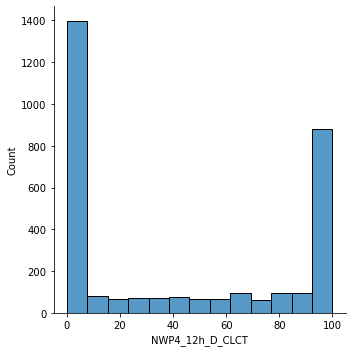

In [21]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

## Relation Target / Variables

### Création des ensembles U, V, T, CLCT

In [22]:
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
X_WF1[liste_U_columns]

NWP1_00h_D-2_U  NWP1_06h_D-2_U  NWP1_12h_D-2_U  NWP1_18h_D-2_U  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235             NaN             NaN          0.3473         -1.5473   
6236             NaN             NaN          0.2612         -2.2067   
6237             NaN             NaN          0.2305         -2.9508   
6238             NaN             NaN         -0.0387         -3.3918   
6239         -4.1665         -2.8647         -3.1646         -3.5799   

      NWP1_00h_D-1_U  NWP1_06h_D-1_U  NWP1_12h_D-1_U  NWP1_18h_D-1_U  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235         -1.8275         -1.4071         -2.5989         -3.1709   
6236         -1.9280         -1.2199         -2.6599         -3.0365   
6237         -2.3704         -1.2968         -2.8425         -3.1156   
6238         -3.6865         -2.1258         -2.9971         -3.5335   
6239         -3.1582         -3.0179         -2.4646         -2.6535   

      NWP1_00h_D_U  NWP1_06h_D_U  NWP1_12h_D_U  NWP1_18h_D_U  NWP2_00h_D-2_U  \
ID                                                                             
1          -2.2485           NaN           NaN           NaN             NaN   
2          -2.4345           NaN           NaN           NaN             NaN   
3           3.3659           NaN           NaN           NaN             NaN   
4           3.7065           NaN           NaN           NaN             NaN   
5           3.8134           NaN           NaN           NaN             NaN   
...            ...           ...           ...           ...             ...   
6235       -1.8757       -2.5780       -3.1851       -2.5467             NaN   
6236       -1.8455       -2.7016       -3.4590       -3.0983             NaN   
6237       -2.1601       -2.8080       -3.2082       -3.2611             NaN   
6238       -2.9310       -2.8902       -2.8762       -3.3457             NaN   
6239       -3.9338           NaN           NaN           NaN         -1.1561   

      NWP2_12h_D-2_U  NWP2_00h_D-1_U  NWP2_12h_D-1_U  NWP2_00h_D_U  \
ID                                                                   
1                NaN             NaN             NaN           NaN   
2                NaN             NaN             NaN           NaN   
3                NaN             NaN             NaN        2.6117   
4                NaN             NaN             NaN           NaN   
5                NaN             NaN             NaN           NaN   
...              ...             ...             ...           ...   
6235             NaN             NaN             NaN           NaN   
6236         -0.4827         -0.6185         -0.3145       -0.2909   
6237             NaN             NaN             NaN           NaN   
6238             NaN             NaN             NaN           NaN   
6239         -0.6944         -0.2185          0.1276       -1.8036   

      NWP2_12h_D_U  NWP3_00h_D-2_U  NWP3_06h_D-2_U  NWP3_12h_D-2_U  \
ID                                                                   
1              NaN             NaN      

In [23]:
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
X_WF1[liste_V_columns]

NWP1_00h_D-2_V  NWP1_06h_D-2_V  NWP1_12h_D-2_V  NWP1_18h_D-2_V  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235             NaN             NaN         -8.5346         -7.3751   
6236             NaN             NaN         -8.0914         -6.9415   
6237             NaN             NaN         -7.5968         -5.9863   
6238             NaN             NaN         -7.4705         -4.1460   
6239         -3.6297         -4.8536         -2.9202         -2.6938   

      NWP1_00h_D-1_V  NWP1_06h_D-1_V  NWP1_12h_D-1_V  NWP1_18h_D-1_V  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235         -7.4787         -7.5982         -7.1385         -5.6166   
6236         -7.0114         -6.9701         -6.5888         -4.8666   
6237         -6.9620         -6.8410         -5.2146         -4.4908   
6238         -5.9545         -6.3920         -4.0063         -3.9296   
6239         -2.7599         -2.6714         -0.7403         -1.2159   

      NWP1_00h_D_V  NWP1_06h_D_V  NWP1_12h_D_V  NWP1_18h_D_V  NWP2_00h_D-2_V  \
ID                                                                             
1          -3.2578           NaN           NaN           NaN             NaN   
2          -1.4461           NaN           NaN           NaN             NaN   
3          -3.0605           NaN           NaN           NaN             NaN   
4          -6.2174           NaN           NaN           NaN             NaN   
5          -5.4446           NaN           NaN           NaN             NaN   
...            ...           ...           ...           ...             ...   
6235       -7.1469       -7.1942       -6.6765       -7.6859             NaN   
6236       -7.1370       -6.6609       -5.3216       -6.7763             NaN   
6237       -6.7729       -5.5717       -3.5422       -5.2765             NaN   
6238       -5.1456       -4.3017       -1.9715       -3.0868             NaN   
6239       -1.2971           NaN           NaN           NaN         -3.0806   

      NWP2_12h_D-2_V  NWP2_00h_D-1_V  NWP2_12h_D-1_V  NWP2_00h_D_V  \
ID                                                                   
1                NaN             NaN             NaN           NaN   
2                NaN             NaN             NaN           NaN   
3                NaN             NaN             NaN       -2.3427   
4                NaN             NaN             NaN           NaN   
5                NaN             NaN             NaN           NaN   
...              ...             ...             ...           ...   
6235             NaN             NaN             NaN           NaN   
6236         -5.7739         -5.4882         -5.9186       -5.9528   
6237             NaN             NaN             NaN           NaN   
6238             NaN             NaN             NaN           NaN   
6239         -3.6143         -4.3238         -4.5342       -1.4099   

      NWP2_12h_D_V  NWP3_00h_D-2_V  NWP3_06h_D-2_V  NWP3_12h_D-2_V  \
ID                                                                   
1              NaN             NaN      

In [24]:
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
X_WF1[liste_T_columns]

NWP1_00h_D-2_T  NWP1_06h_D-2_T  NWP1_12h_D-2_T  NWP1_18h_D-2_T  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235             NaN             NaN          280.01          279.83   
6236             NaN             NaN          279.52          279.32   
6237             NaN             NaN          279.06          278.92   
6238             NaN             NaN          278.62          278.77   
6239          278.75          278.14          278.71          279.60   

      NWP1_00h_D-1_T  NWP1_06h_D-1_T  NWP1_12h_D-1_T  NWP1_18h_D-1_T  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235          279.64          279.89          280.03          280.60   
6236          279.19          279.38          279.51          280.18   
6237          278.78          278.83          279.18          279.80   
6238          278.55          278.37          278.91          279.60   
6239          279.22          279.14          279.18          278.98   

      NWP1_00h_D_T  NWP1_06h_D_T  NWP1_12h_D_T  NWP1_18h_D_T  NWP3_00h_D-2_T  \
ID                                                                             
1           286.44           NaN           NaN           NaN             NaN   
2           286.26           NaN           NaN           NaN             NaN   
3           285.75           NaN           NaN           NaN      287.000000   
4           284.78           NaN           NaN           NaN             NaN   
5           284.46           NaN           NaN           NaN             NaN   
...            ...           ...           ...           ...             ...   
6235        280.52        280.53        280.46        280.14             NaN   
6236        280.04        280.01        280.05        279.73             NaN   
6237        279.61        279.67        279.75        279.39             NaN   
6238        279.32        279.39        279.45        279.20             NaN   
6239        278.90           NaN           NaN           NaN      281.794373   

      NWP3_06h_D-2_T  NWP3_12h_D-2_T  NWP3_18h_D-2_T  NWP3_00h_D-1_T  \
ID                                                                     
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3         287.000000      286.000000      287.000000      287.000000   
4                NaN             NaN             NaN             NaN   
5                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
6235             NaN             NaN             NaN             NaN   
6236             NaN      280.445068      282.199615      282.278870   
6237             NaN             NaN             NaN             NaN   
6238             NaN             NaN             NaN             NaN   
6239      281.522675      281.514984      281.326691      281.426697   

      NWP3_06h_D-1_T  NWP3_12h_D-1_T  NWP3_18h_D-1_T  NWP3_00h_D_T  \
ID                                                                   
1             

In [25]:
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
X_WF1[liste_CLCT_columns]

NWP4_12h_D-2_CLCT  NWP4_00h_D-1_CLCT  NWP4_12h_D-1_CLCT  \
ID                                                              
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   
5                   NaN                NaN                NaN   
...                 ...                ...                ...   
6235                NaN          -0.000013          -0.000015   
6236                NaN          -0.000013          -0.000015   
6237                NaN          -0.000013          -0.000015   
6238                NaN           0.082388          -0.000015   
6239          -0.000015          -0.000016          -0.000020   

      NWP4_00h_D_CLCT  NWP4_12h_D_CLCT  
ID                                      
1           82.543144              NaN  
2           99.990844              NaN  
3           98.367235              NaN  
4           94.860604              NaN  
5           95.905879              NaN  
...               ...              ...  
6235        -0.000016         -0.00002  
6236        -0.000016         -0.00002  
6237        -0.000016         -0.00002  
6238        -0.000016         -0.00002  
6239        -0.000014              NaN  

[6239 rows x 5 columns]

## Target / U

/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_40068/1370433523.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


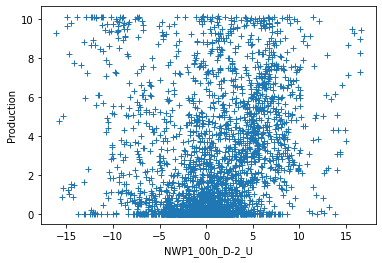

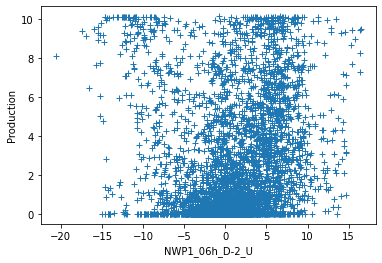

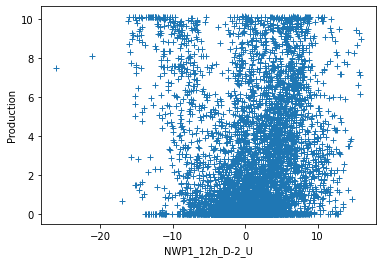

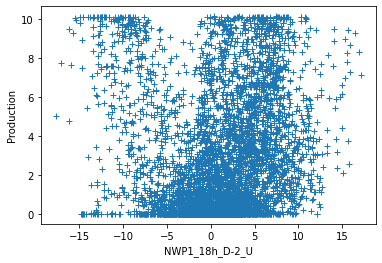

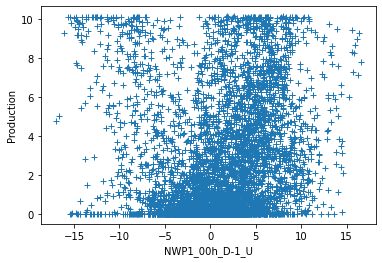

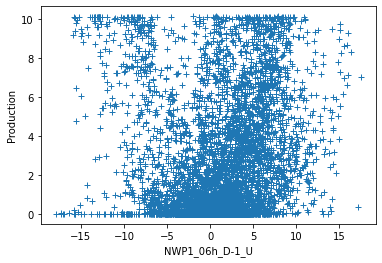

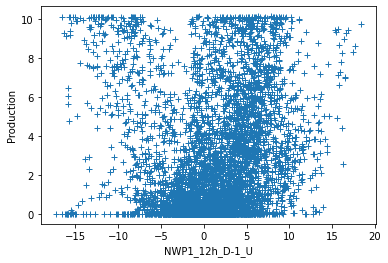

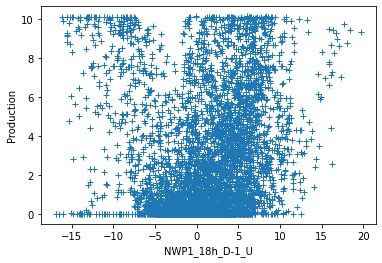

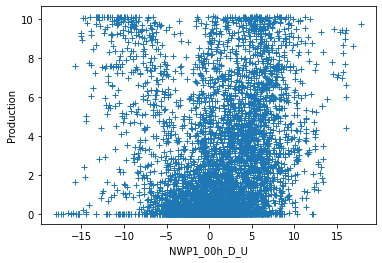

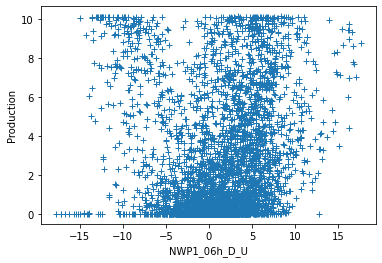

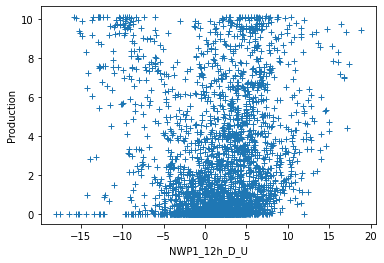

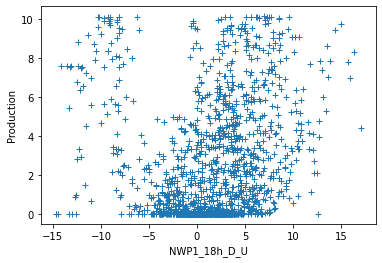

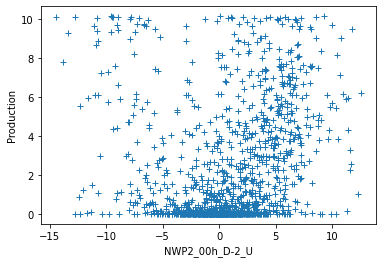

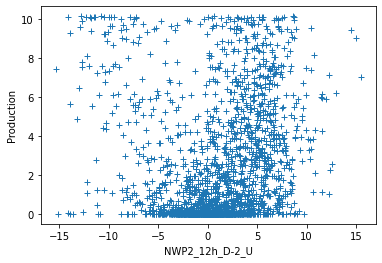

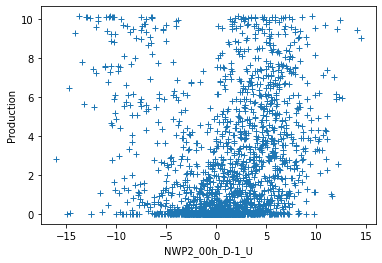

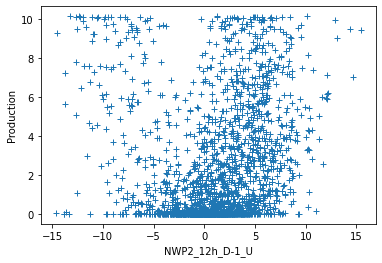

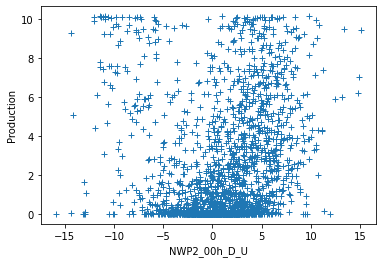

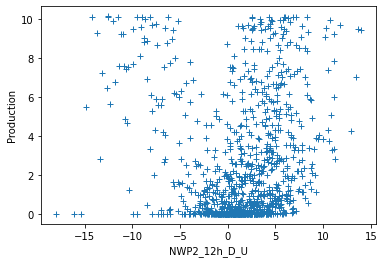

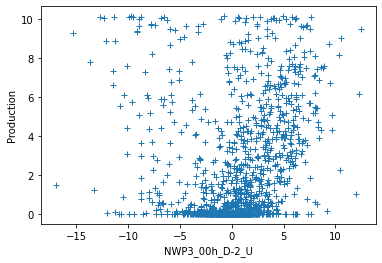

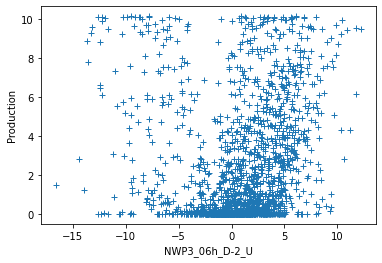

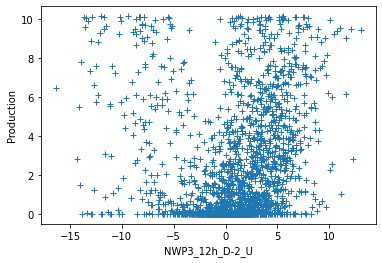

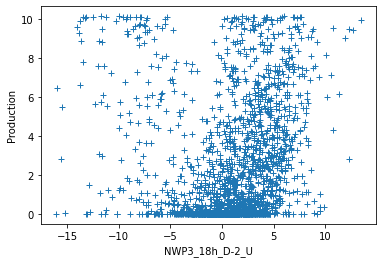

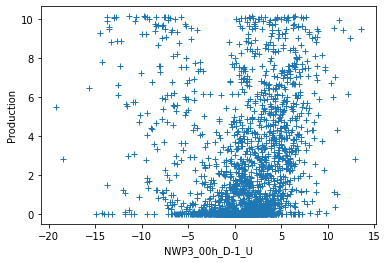

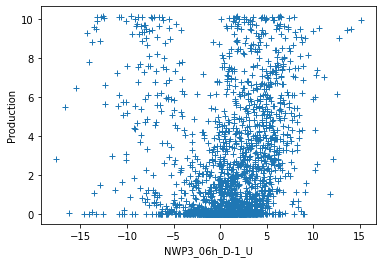

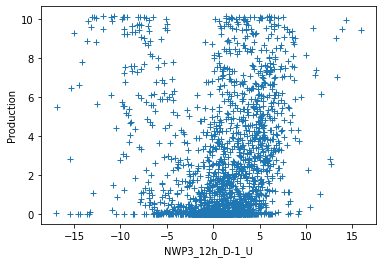

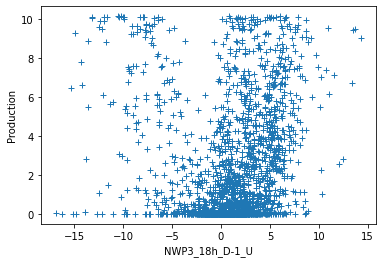

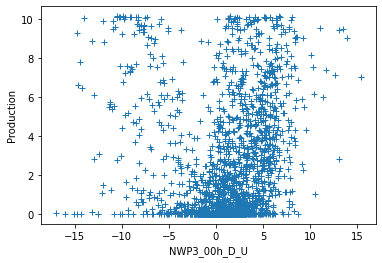

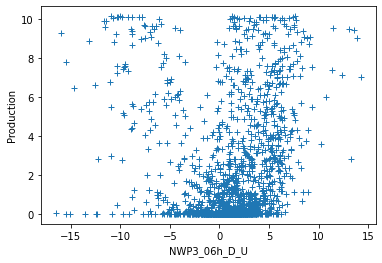

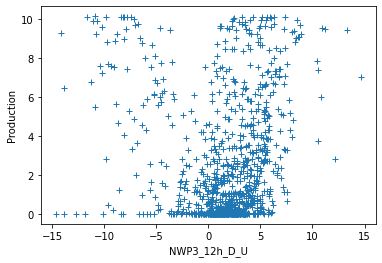

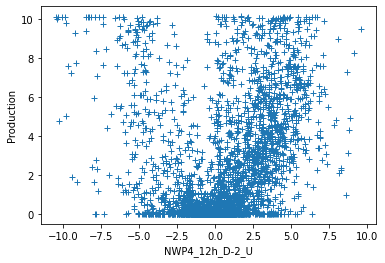

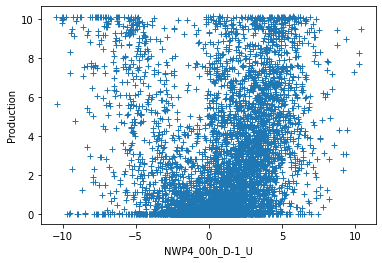

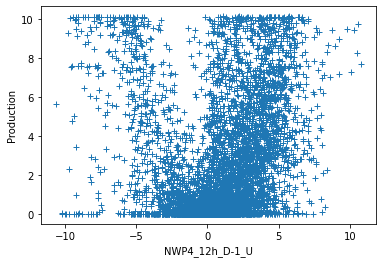

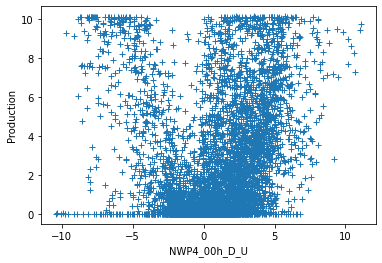

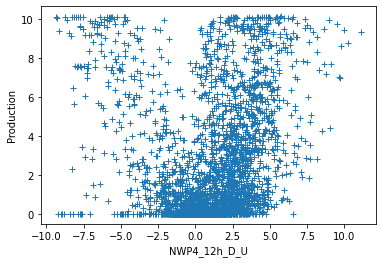

In [26]:
for col in liste_U_columns:
    fig, ax = plt.subplots()
    ax.plot(df[col],y_WF1["Production"],"+")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Production")


### Relation Target / CLCT

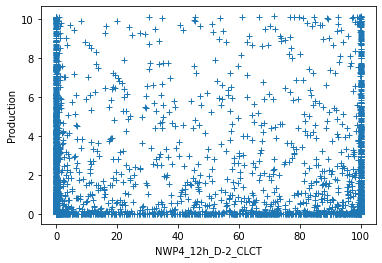

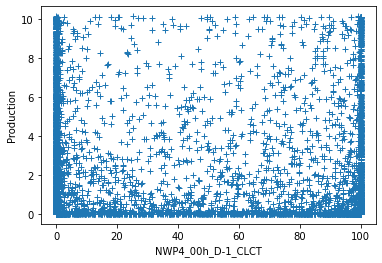

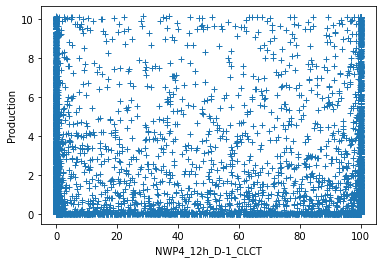

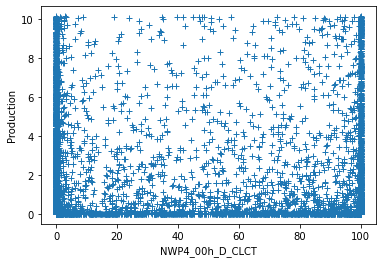

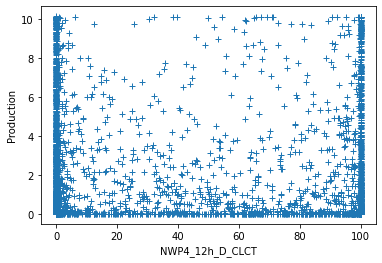

In [27]:
for col in liste_CLCT_columns:
    fig, ax = plt.subplots()
    ax.plot(X_WF1[col],y_WF1["Production"],"+")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Production")

## Analyse un peu plus Avancée
### Relation Variables / Variables

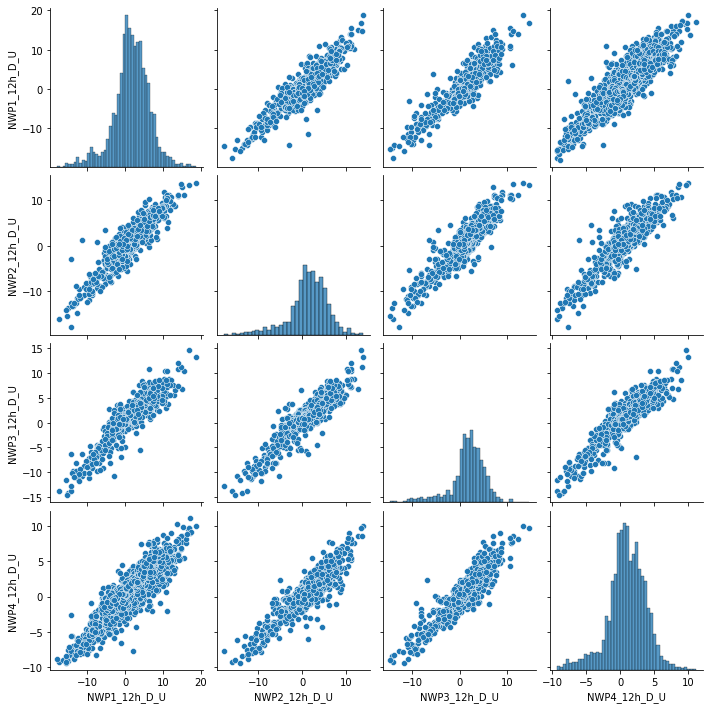

In [38]:
X_WF1_U = X_WF1[liste_U_columns]

sns.pairplot(X_WF1_U[['NWP1_12h_D_U', 'NWP2_12h_D_U', 'NWP3_12h_D_U', 'NWP4_12h_D_U']])



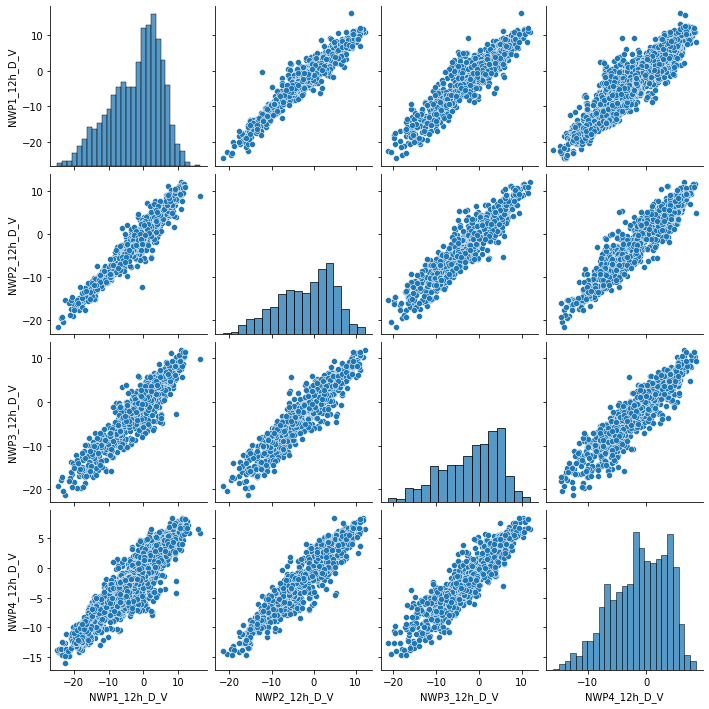

In [41]:
X_WF1_V = X_WF1[liste_V_columns]

sns.pairplot(X_WF1_V[['NWP1_12h_D_V', 'NWP2_12h_D_V', 'NWP3_12h_D_V', 'NWP4_12h_D_V']])

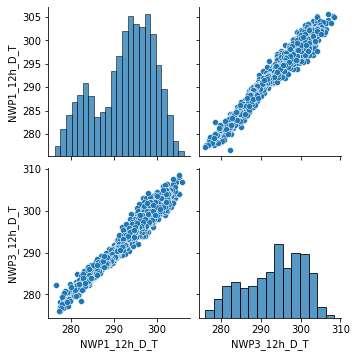

In [66]:
X_WF1_T = X_WF1[liste_T_columns]
sns.pairplot(X_WF1_T[['NWP1_12h_D_T', 'NWP3_12h_D_T']])

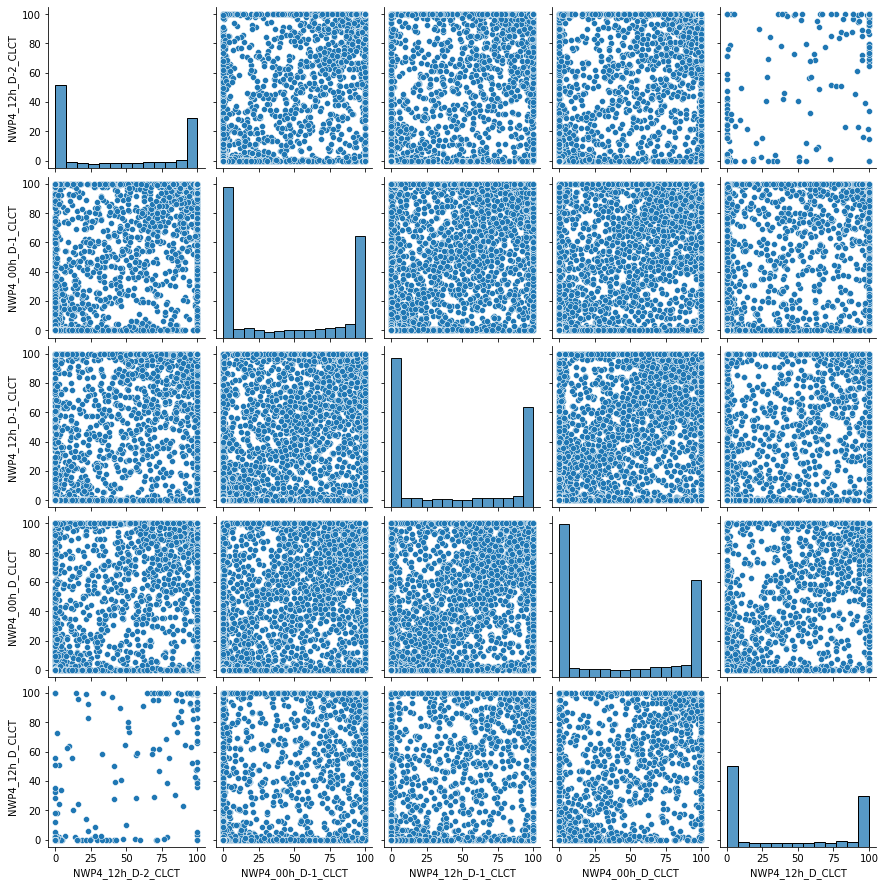

In [65]:
sns.pairplot(X_WF1[liste_CLCT_columns])

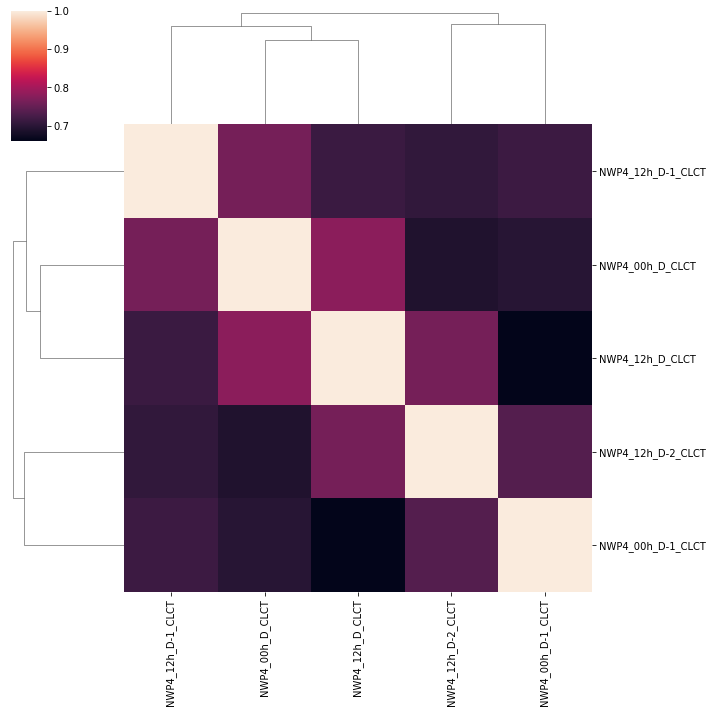

In [29]:
sns.clustermap(X_WF1[liste_CLCT_columns].corr())

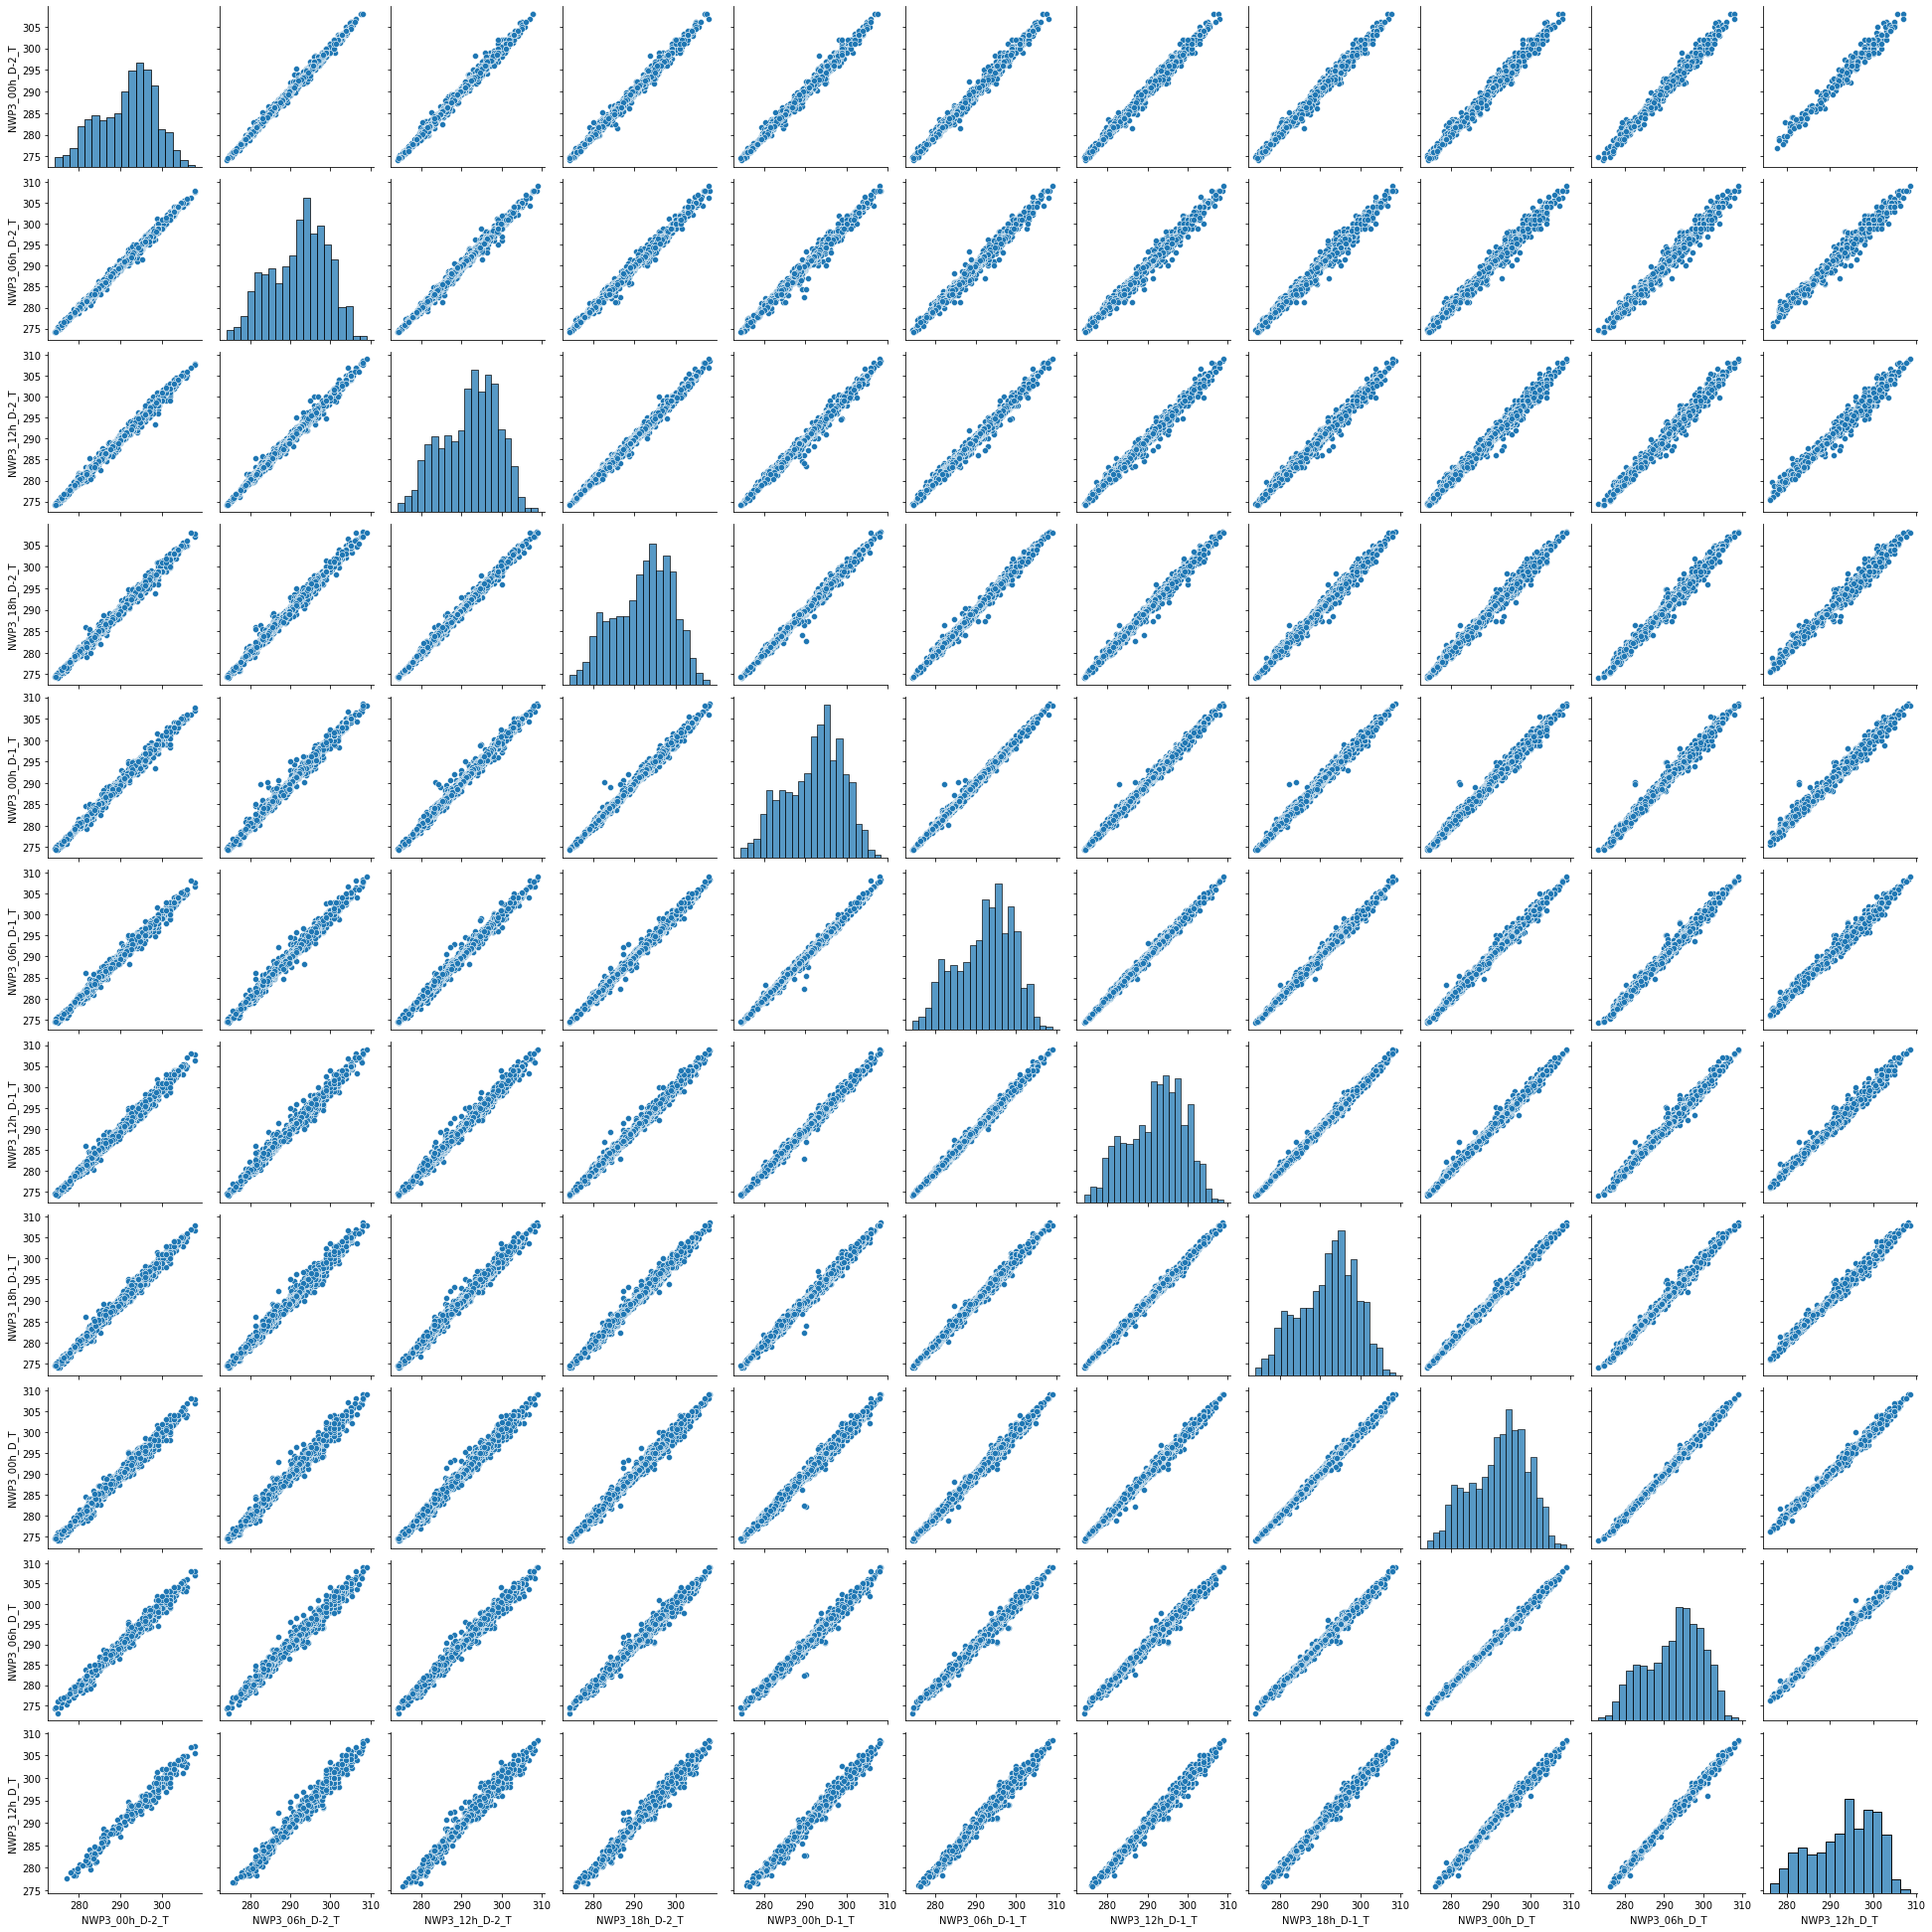

In [64]:
cols_NWP3 = [col for col in X_WF1_T.columns if col.startswith('NWP3')]
sns.pairplot(X_WF1_T[cols_NWP3])

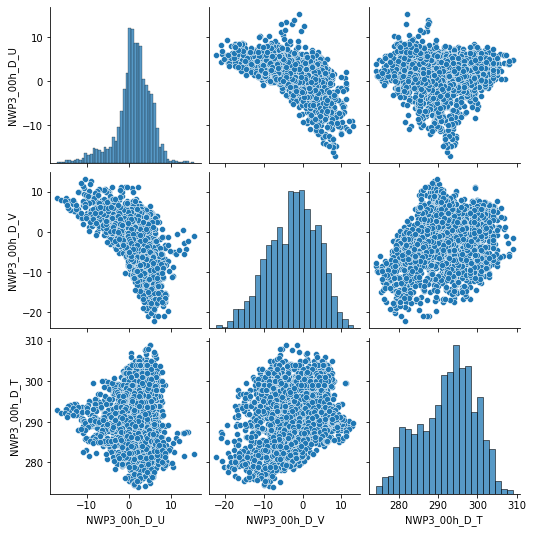

In [70]:
new_df = X_WF1[['NWP3_00h_D_U','NWP3_00h_D_V','NWP3_00h_D_T']]
sns.pairplot(new_df)
# sns.heatmap(new_df.isna(), cbar=False)


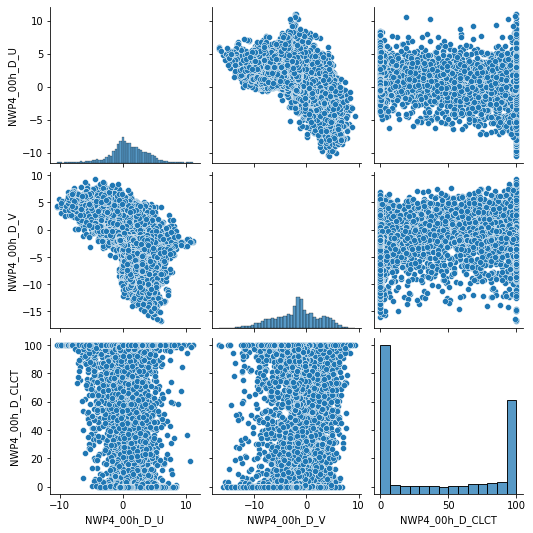

In [71]:
new_df = X_WF1[['NWP4_00h_D_U','NWP4_00h_D_V','NWP4_00h_D_CLCT']]
sns.pairplot(new_df)
# sns.heatmap(new_df.isna(), cbar=False)